In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv",index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

In [5]:
%matplotlib inline

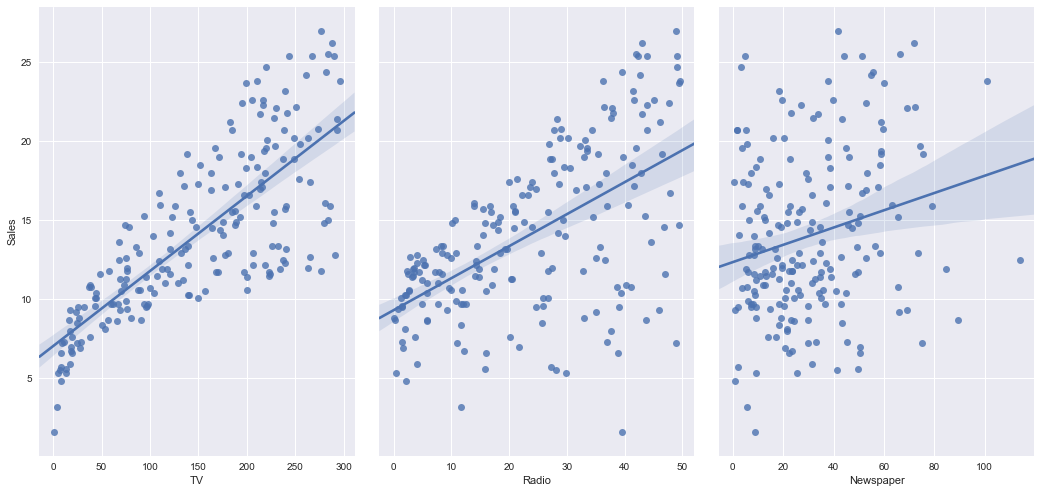

In [6]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

In [7]:
feature_cols=['TV','Radio','Newspaper']

x = data[feature_cols]

x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
print type(x)
print x.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
y=data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200L,)


In [11]:
from sklearn.cross_validation import train_test_split

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [13]:
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150L,)
(50L,)


In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [16]:
zip(feature_cols,linreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

In [17]:
y_pred = linreg.predict(x_test)
print x_test
print y_pred

        TV  Radio  Newspaper
59   210.8   49.6       37.7
41   202.5   22.3       31.6
35    95.7    1.4        7.4
103  280.2   10.1       21.4
185  253.8   21.3       30.0
199  283.6   42.0       66.2
96   163.3   31.6       52.9
5    180.8   10.8       58.4
30    70.6   16.0       40.8
169  215.4   23.6       57.6
172  164.5   20.9       47.4
19    69.2   20.5       18.3
12   214.7   24.0        4.0
90   109.8   47.8       51.4
111  225.8    8.2       56.5
119  125.7   36.9       79.2
160  131.7   18.4       34.6
36   290.7    4.1        8.5
137   25.6   39.0        9.3
60   210.7   29.5        9.3
52   100.4    9.6        3.6
17    67.8   36.6      114.0
45    25.1   25.7       43.3
95   107.4   14.0       10.9
32   112.9   17.4       38.6
163  188.4   18.1       25.6
39    43.1   26.7       35.1
29   248.8   27.1       22.9
194  166.8   42.0        3.6
28   240.1   16.7       22.9
48   239.9   41.5       18.5
166  234.5    3.4       84.8
195  149.7   35.6        6.0
178  170.2    

In [19]:
linreg.score(x_test,y_test)

0.91562136137922334

In [22]:
linreg.predict([90.4,0.3,23.2])

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 7.22020178])